In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import collections as col
import numpy as np 
import time
import json
import requests

## Import and inspect data

In [51]:
oil_df = pd.read_csv('oildataRAW.csv')
price_df = pd.read_csv('price_per_barrel_01042010-01312017.csv')
#note that I removed the first three text columns so that the csv could be read properly(js)

In [31]:
oil_df.head()

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650


In [16]:
oil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 48 columns):
Report Number                           2795 non-null int64
Supplemental Number                     2795 non-null int64
Accident Year                           2795 non-null int64
Accident Date/Time                      2795 non-null object
Operator ID                             2795 non-null int64
Operator Name                           2795 non-null object
Pipeline/Facility Name                  2674 non-null object
Pipeline Location                       2795 non-null object
Pipeline Type                           2777 non-null object
Liquid Type                             2795 non-null object
Liquid Subtype                          1349 non-null object
Liquid Name                             222 non-null object
Accident City                           2480 non-null object
Accident County                         2720 non-null object
Accident State                          2783

## Sort by Cost

In [21]:
df_byCost = oil_df.sort_values(by=['All Costs'], ascending=False)
info = ['Accident Year','Operator Name','Accident City', 'Accident State', 'Cause Category'
       ,'Cause Subcategory','All Costs']
df_byCost[info].head()

,Accident Year,Operator Name,Accident City,Accident State,Cause Category,Cause Subcategory,All Costs
194,2010,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",MARSHALL,MI,MATERIAL/WELD/EQUIP FAILURE,ENVIRONMENTAL CRACKING-RELATED,840526118
2103,2015,"PLAINS PIPELINE, L.P.",GOLETA,CA,CORROSION,EXTERNAL,142931884
523,2011,EXXONMOBIL PIPELINE CO,LAUREL,MT,NATURAL FORCE DAMAGE,HEAVY RAINS/FLOODS,135000000
1173,2013,MOBIL PIPE LINE COMPANY,MAYFLOWER,AR,MATERIAL/WELD/EQUIP FAILURE,MANUFACTURING-RELATED,91300000
2675,2016,COLONIAL PIPELINE CO,HELENA,AL,ALL OTHER CAUSES,UNKNOWN,66234072


## MOST COMMON "SPILLERS"

In [22]:
most_common = col.Counter(oil_df["Operator ID"].values)
ids = [x[0] for x in most_common.most_common(20)]

hXvalue = []
hvalues = []
hlabels = []

for j,i in enumerate(ids):
    hXvalue.append(j+1)
    hvalues.append(most_common[i])
    hlabels.append(" or ".join(oil_df['Operator Name'].loc[oil_df['Operator ID'] == i].unique()))

hlabels,hvalues

(['TEPPCO CRUDE PIPELINE, LLC or ENTERPRISE CRUDE PIPELINE LLC',
  'SUNOCO PIPELINE L.P.',
  'PLAINS PIPELINE, L.P.',
  'ENTERPRISE PRODUCTS OPERATING LLC',
  'MAGELLAN PIPELINE COMPANY, LP',
  'COLONIAL PIPELINE CO',
  'BUCKEYE PARTNERS, LP',
  'CONOCOPHILLIPS or PHILLIPS 66 PIPELINE LLC',
  'KINDER MORGAN LIQUID TERMINALS, LLC',
  'MARATHON PIPE LINE LLC',
  'ONEOK NGL PIPELINE LP or ONEOK NGL PIPELINE, LLC',
  'ENBRIDGE ENERGY, LIMITED PARTNERSHIP',
  'SHELL PIPELINE CO., L.P.',
  'EXXONMOBIL PIPELINE CO',
  'EXPLORER PIPELINE CO',
  'MAGELLAN AMMONIA PIPELINE, L.P.',
  'KOCH PIPELINE COMPANY, L.P.',
  'CHEVRON PIPE LINE CO',
  'NUSTAR PIPELINE OPERATING PARTNERSHIP L.P.',
  'PLANTATION PIPE LINE CO'],
 [201,
  180,
  156,
  155,
  140,
  136,
  115,
  114,
  87,
  87,
  75,
  71,
  60,
  47,
  42,
  37,
  36,
  34,
  33,
  32])

### MOST COMMON SPILL CAUSES

In [23]:
spill_causes = col.Counter(oil_df["Cause Category"].values)
ids2 = [x[0] for x in spill_causes.most_common(10)]
hXvalue2 = []
hvalues2 = []
hlabels2 = []

for j,i in enumerate(ids2):
    hXvalue2.append(j+1)
    hvalues2.append(spill_causes[i])
    hlabels2.append(i)

hlabels2, hvalues2

(['MATERIAL/WELD/EQUIP FAILURE',
  'CORROSION',
  'INCORRECT OPERATION',
  'NATURAL FORCE DAMAGE',
  'ALL OTHER CAUSES',
  'EXCAVATION DAMAGE',
  'OTHER OUTSIDE FORCE DAMAGE'],
 [1435, 592, 378, 118, 118, 97, 57])

In [24]:
spills_per_state_percentage = oil_df["Accident State"].value_counts(normalize=True).sort_values(ascending=False);
spills_per_state_number = oil_df["Accident State"].value_counts()
spills_per_state_percentage
spills_per_state_number

TX    1004
OK     236
LA     169
CA     153
KS     150
IL     108
WY      98
NJ      85
MN      59
NM      57
IN      57
OH      53
ND      49
IA      46
PA      45
MO      42
MS      32
MT      30
MI      29
WI      27
CO      24
NE      22
AL      21
VA      20
GA      17
SC      16
NC      15
KY      14
NY      14
AR      13
AK      11
SD       9
MD       8
WA       8
UT       8
TN       7
FL       7
ID       4
OR       4
HI       3
WV       2
MA       2
CT       2
ME       1
NV       1
PR       1
Name: Accident State, dtype: int64

## By state
 - Property damage
 - Non-accident states

In [25]:
property_damage = oil_df.groupby("Accident State")["Property Damage Costs"].sum().sort_values(ascending=False)
property_damage

Accident State
TX    57246318.0
LA    53402564.0
AK    44156471.0
CA    20376668.0
IN    15902914.0
IL    14927457.0
WI    14653046.0
OK    10212737.0
MT     9145728.0
IA     8660767.0
OH     6028545.0
MI     5120508.0
MN     4609727.0
PA     4151833.0
KS     3526302.0
WV     3321591.0
NJ     3185475.0
ND     2782208.0
AL     2642900.0
NY     2599716.0
AR     2334549.0
VA     2005511.0
NC     1888256.0
NM     1697794.0
SD     1603227.0
CO     1510180.0
NE     1353342.0
WY     1120080.0
SC     1064980.0
UT     1030415.0
MS      901866.0
GA      615556.0
MO      523819.0
FL      435750.0
TN      369700.0
KY      258099.0
MA      192500.0
ID      179506.0
WA      152581.0
MD      142893.0
PR       90005.0
OR       81344.0
CT       35000.0
HI       14200.0
NV       14000.0
ME        4000.0
Name: Property Damage Costs, dtype: float64

In [32]:
oil_df['Accident State'].factorize()

(array([ 0,  1,  2, ...,  6, 20,  4]),
 Index(['KS', 'ME', 'LA', 'WI', 'TX', 'ND', 'OK', 'IL', 'MN', 'NY', 'CA', 'IN',
        'CO', 'MS', 'NJ', 'WA', 'IA', 'NC', 'MO', 'NM', 'PA', 'FL', 'VA', 'WY',
        'KY', 'TN', 'MI', 'ID', 'GA', 'NV', 'OH', 'SD', 'AK', 'SC', 'UT', 'NE',
        'MT', 'AL', 'AR', 'MD', 'PR', 'CT', 'OR', 'WV', 'HI', 'MA'],
       dtype='object'))

In [35]:
states = ['KS', 'ME', 'LA', 'WI', 'TX', 'ND', 'OK', 'IL', 'MN', 'NY', 'CA', 'IN',
        'CO', 'MS', 'NJ', 'WA', 'IA', 'NC', 'MO', 'NM', 'PA', 'FL', 'VA', 'WY',
        'KY', 'TN', 'MI', 'ID', 'GA', 'NV', 'OH', 'SD', 'AK', 'SC', 'UT', 'NE',
        'MT', 'AL', 'AR', 'MD', 'PR', 'CT', 'OR', 'WV', 'HI', 'MA']
len(states)

46

In [36]:
states_2 = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
non_accident_states = list(set(states_2) - set(states))
non_accident_states

['AZ', 'NH', 'VT', 'DE', 'DC', 'RI']

In [37]:
accident_causes = oil_df.groupby("Accident State")["Cause Subcategory"].value_counts()
accident_causes["HI"]

Cause Subcategory
EXTERNAL                                2
THREADED CONNECTION/COUPLING FAILURE    1
Name: Cause Subcategory, dtype: int64

## Fatalities

In [41]:
oil_df['All Fatalities'].sum()

10.0

In [42]:
oil_df['All Fatalities'].max()

2.0

In [43]:
oil_df.loc[oil_df['All Fatalities'] == 2]

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
758,20120098,17932,2012,3/3/2012 2:04 AM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",LINE 64,ONSHORE,ABOVEGROUND,CRUDE OIL,...,0.0,2.0,2.0,864819.0,124500.0,0.0,915512.0,931946.0,0.0,2836777
2730,20160391,21890,2016,10/31/2016 2:51 PM,2552,COLONIAL PIPELINE CO,LINE 01,ONSHORE,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [44]:
worst_fatalty_daysworst_fa  = oil_df.loc[oil_df['All Fatalities'] == 2]['Accident Date/Time']
oil_df.loc[oil_df['All Fatalities'] == 2]['Accident Date/Time']

758       3/3/2012 2:04 AM
2730    10/31/2016 2:51 PM
Name: Accident Date/Time, dtype: object

## Injuries

In [45]:
oil_df['All Injuries'].sum()

20.0

In [46]:
oil_df['All Injuries'].max()

4.0

In [47]:
oil_df.loc[oil_df['All Injuries'] == 4]

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
2730,20160391,21890,2016,10/31/2016 2:51 PM,2552,COLONIAL PIPELINE CO,LINE 01,ONSHORE,UNDERGROUND,"REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LI...",...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [48]:
worst_injury_days = oil_df.loc[oil_df['All Injuries'] == 2]['Accident Date/Time']
oil_df.loc[oil_df['All Injuries'] == 2]['Accident Date/Time']

1385    9/30/2013 6:45 PM
Name: Accident Date/Time, dtype: object

## Other distributions and counts

In [27]:
liquid_type = oil_df["Liquid Type"].value_counts()
liquid_type

CRUDE OIL                                               1398
REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID       939
HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS               418
CO2 (CARBON DIOXIDE)                                      38
BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS)       2
Name: Liquid Type, dtype: int64

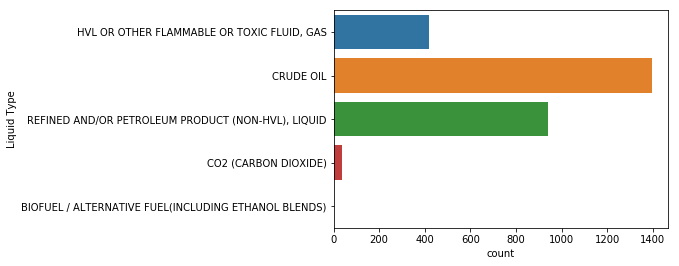

In [3]:
cp = sns.countplot(y=oil_df['Liquid Type'], data=oil_df)

In [28]:
location = oil_df["Pipeline Location"].value_counts()
location

ONSHORE     2777
OFFSHORE      18
Name: Pipeline Location, dtype: int64

In [30]:
pipeline_type = oil_df["Pipeline Type"].value_counts()
pipeline_type

ABOVEGROUND        1475
UNDERGROUND         985
TANK                301
TRANSITION AREA      16
Name: Pipeline Type, dtype: int64

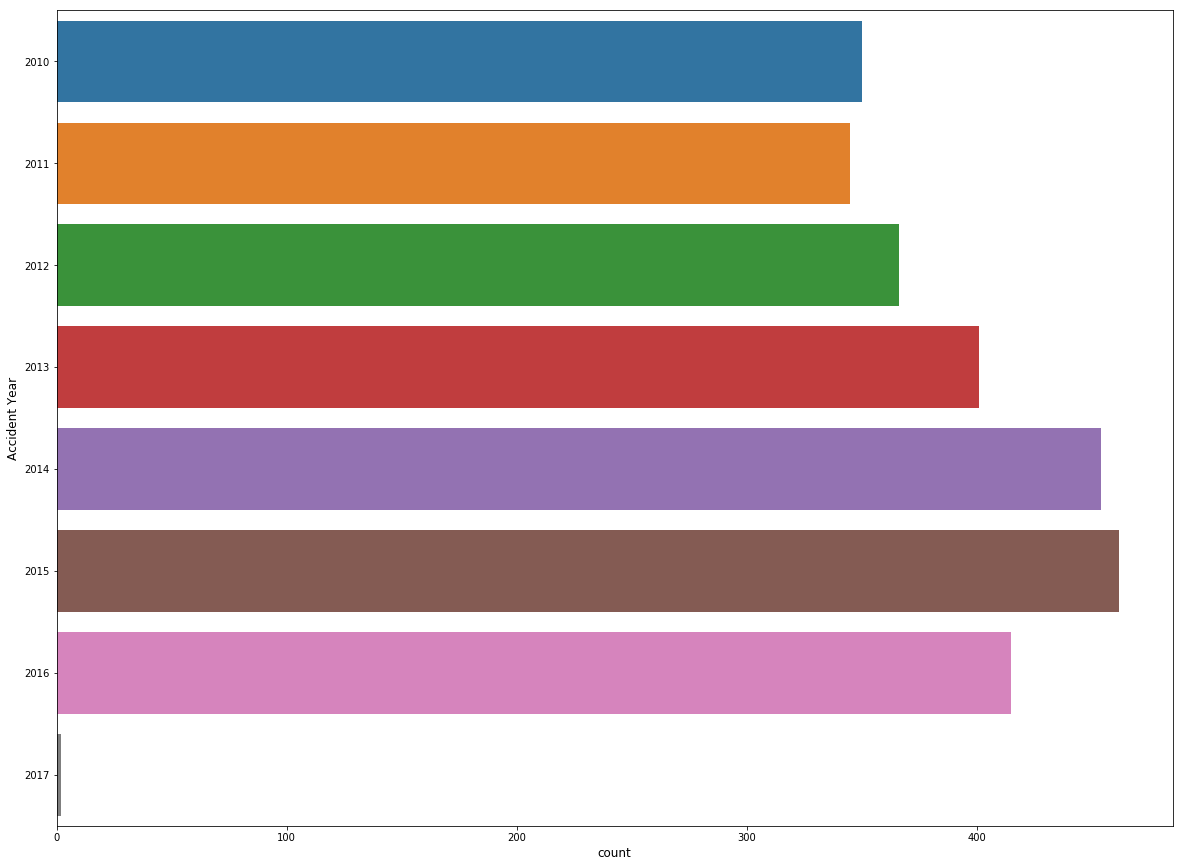

In [29]:
cpy = sns.countplot(y=oil_df['Accident Year'], data=oil_df)

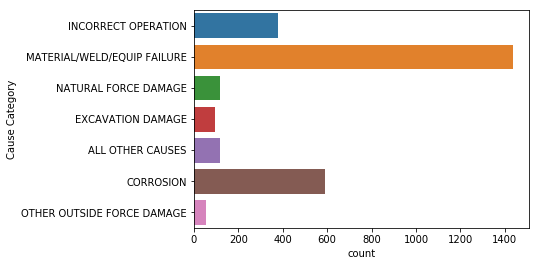

## Causes and subcauses
(industry as a whole)

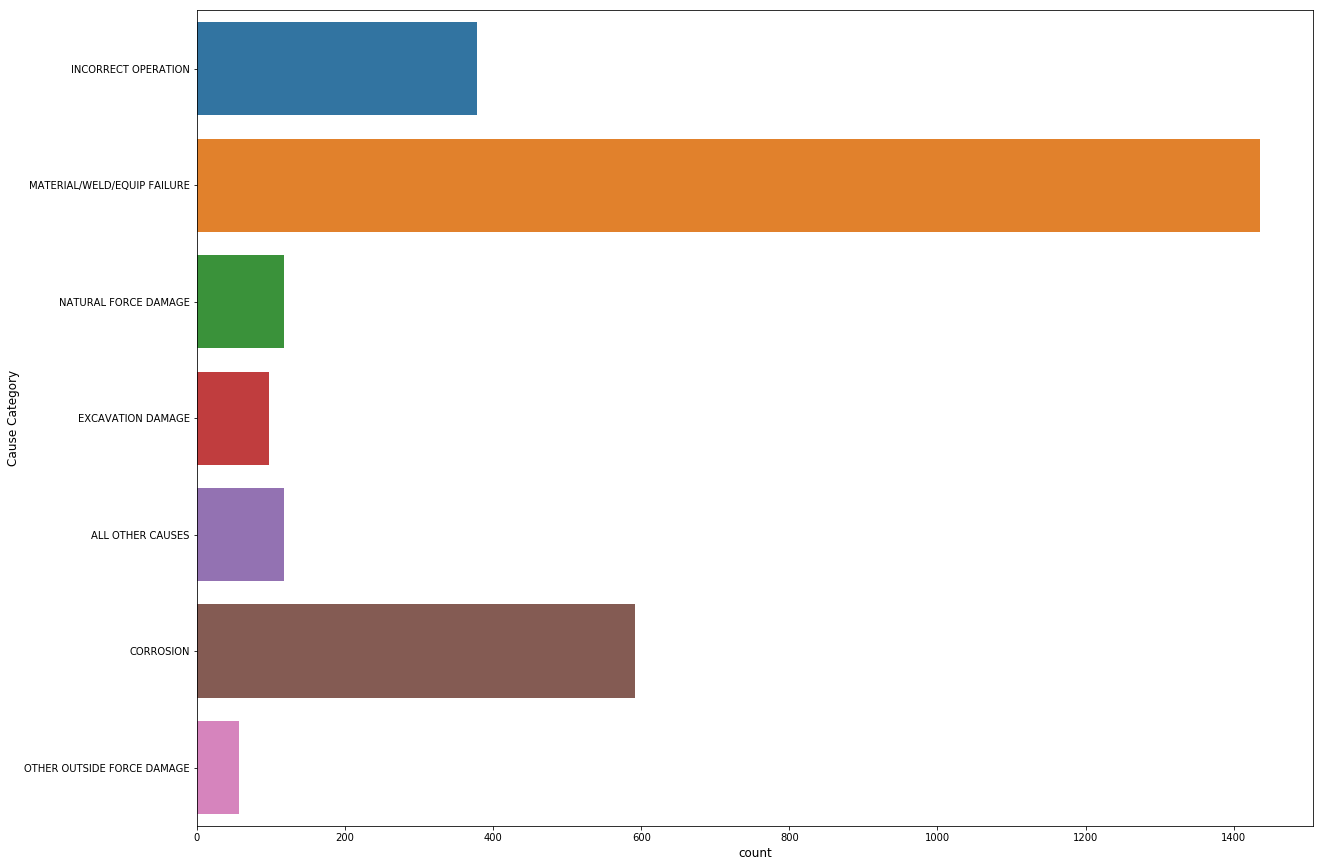

In [50]:
cp = sns.countplot(y=oil_df['Cause Category'], data=oil_df)

In [6]:
oil_df_n = oil_df.rename(columns={'Cause Subcategory': 'cause_subcategory', 'Net Loss (Barrels)': 'net_loss'})

In [7]:
plt.rcParams['figure.figsize']=(20,15)
plt.rcParams['axes.labelsize']=12
#remap key values

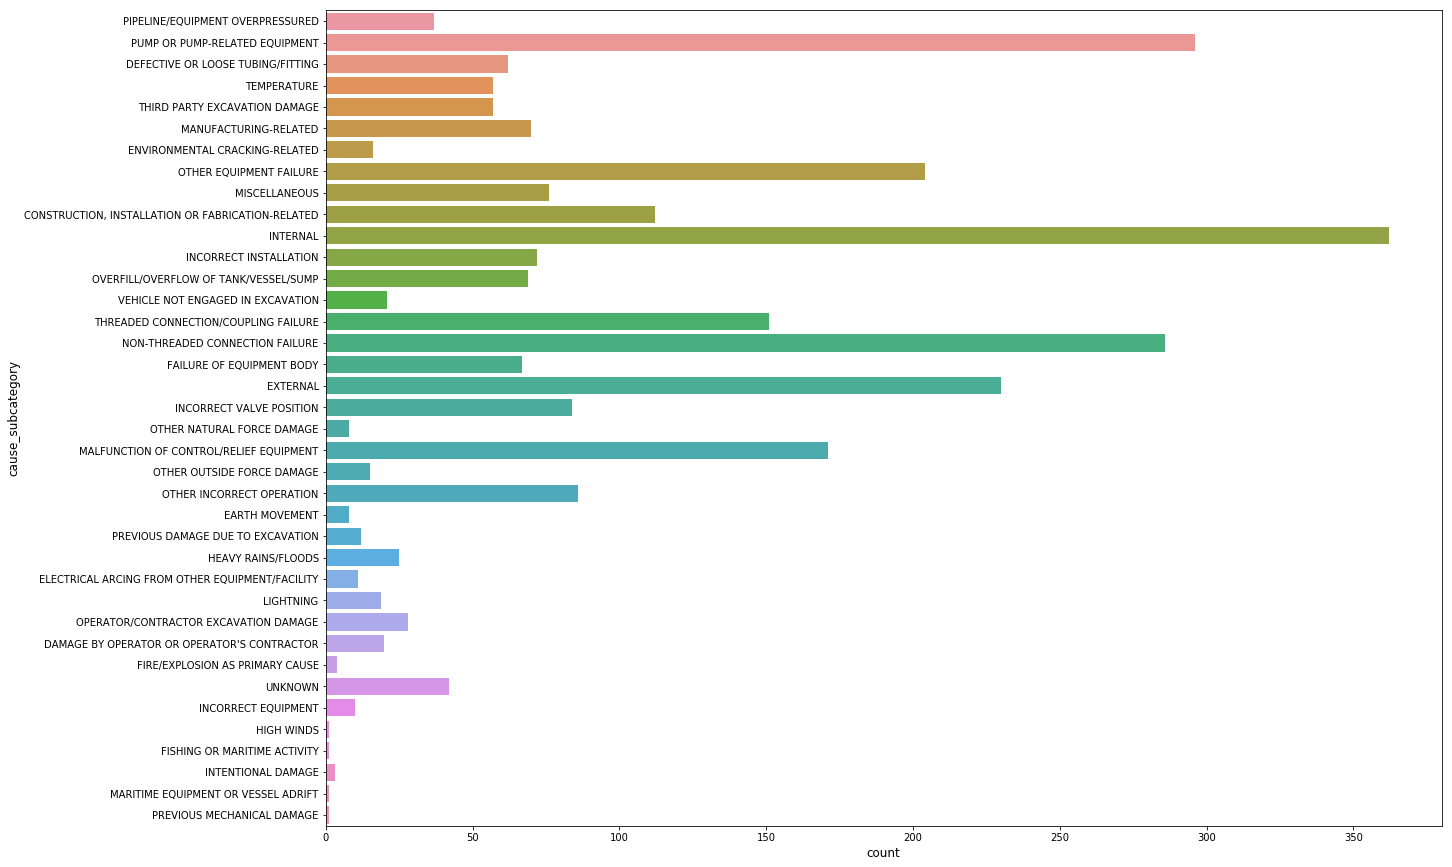

In [8]:
sns.countplot(y=oil_df_n['cause_subcategory'], data=oil_df_n);
#loss in barrels

In [9]:
df_sm = oil_df_n[['net_loss','cause_subcategory']]

In [10]:
subcat = df_sm.groupby('cause_subcategory').sum()

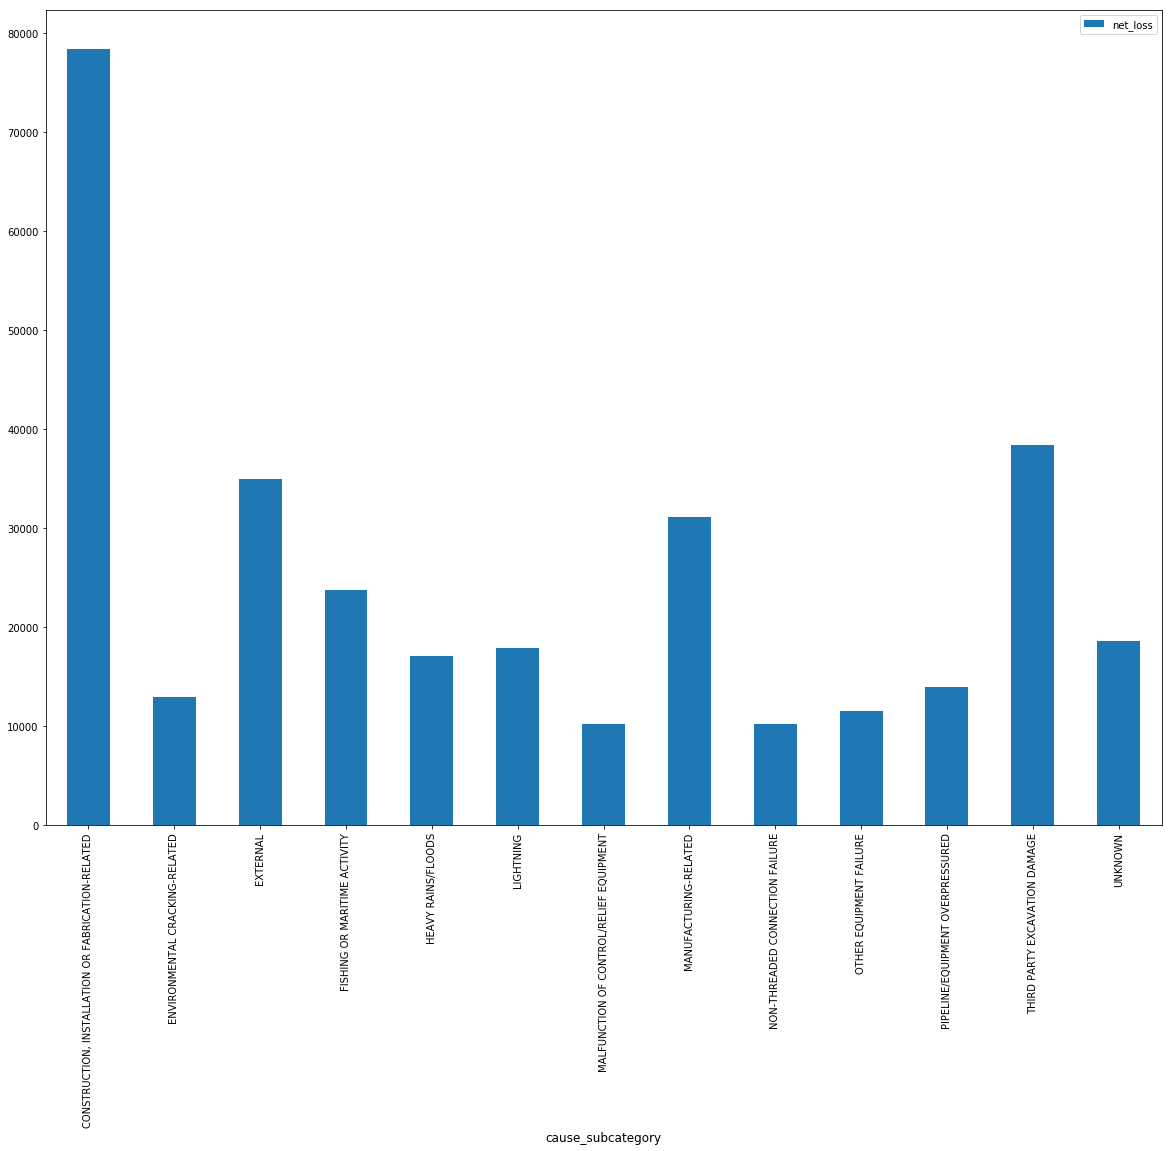

In [11]:
subcat.query('net_loss > 10000').plot.bar();
#TODO sort these values - fix this

## Price distribution

In [12]:
pricedf = price_df.rename(columns={'Series ID: PET.RWTC.D Dollars per Barrel': 'ppb'})
pricedf = pricedf.dropna()
pricedf['Day'] = pd.to_datetime(pricedf.Day)
pricedf = pricedf.sort_values('Day')

In [13]:
pricedf.head()

,Day,ppb
1784,2010-01-04,81.52
1783,2010-01-05,81.74
1782,2010-01-06,83.12
1781,2010-01-07,82.60
1780,2010-01-08,82.74


In [14]:
pricedf.shape

(1785, 2)

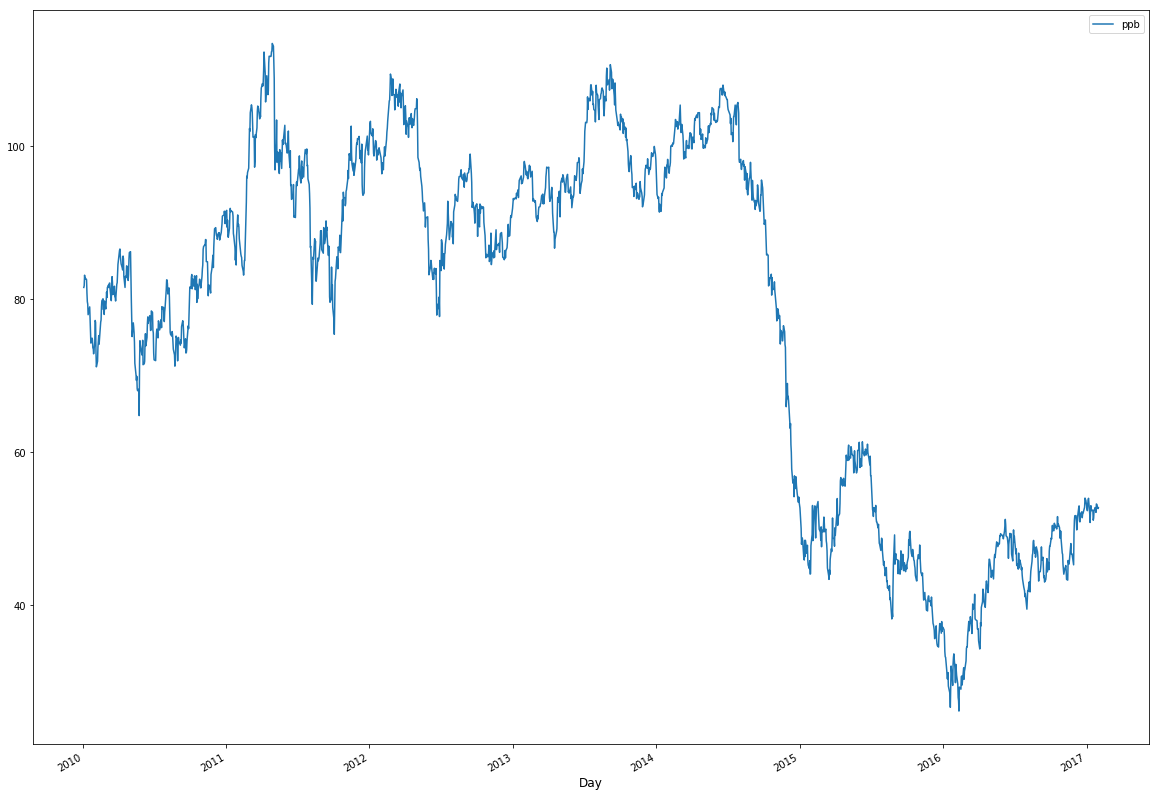

In [15]:
pricedf.plot(x='Day', y='ppb');

## Merge the datasets